<a href="https://colab.research.google.com/github/AbrahamOtero/MLiB/blob/main/4_PredictiveModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predictive models

We import the libraries that we are going to need

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Decission trees

Let us train a decision tree on the iris dataset. For this we can use **DecisionTreeClassifier**. We also have a class called **DecisionTreeRegressor** for regression problems; this class predicts a metric value equal to the average of the target value of all instances falling in each leaf.

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/iris.csv'
iris = pd.read_csv(url)

X_iris = iris.iloc[:, :-1]
y_iris = iris.iloc[:, -1]

# No more than 3 deoth levels in the tree
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_iris, y_iris)

#display the tree as text
text_representation = tree.export_text(tree_clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: Virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: Virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Virginica



We can also plot the tree using **export_graphviz**

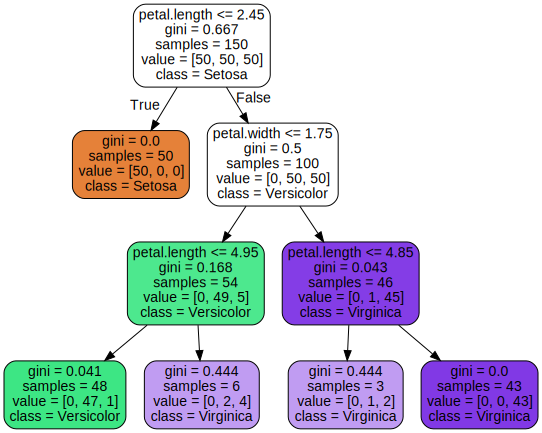

In [3]:
from sklearn.tree import export_graphviz

# We need the names of the feateres and classes
feature_names= X_iris.columns
target_names = y_iris.unique()

export_graphviz(
        tree_clf,
        out_file=str("iris_tree.dot"),
        feature_names=feature_names,
        class_names=target_names,
        rounded=True,
        filled=True
    )

from graphviz import Source

Source.from_file("iris_tree.dot")

We can use entropy to build the tree by specifying **criterion='entropy'**. As you can see, the results are very similar. The parameters **max_depth=None**, **min_samples_split**, **min_samples_leaf**, **max_leaf_nodes**, and **min_impurity_decrease** (see sklearn documentation) can help us control the complexity of the tree; the more complex the tree, the more likely it is to over-fit the data; while the less complex the tree, the more likely it is to under-fit the data.

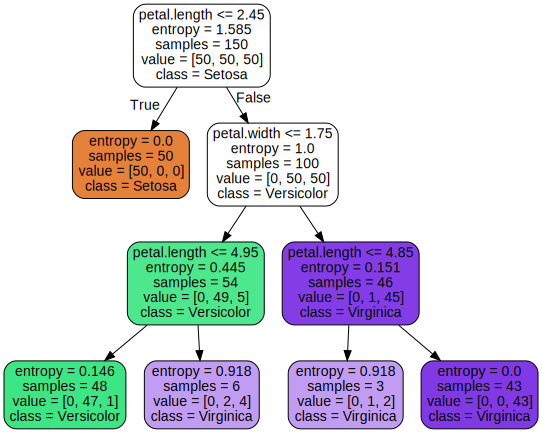

In [ ]:
# Use entropy instead of gini
tree_clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
tree_clf.fit(X_iris, y_iris)

export_graphviz(
        tree_clf,
        out_file=str("iris_tree.dot"),
        feature_names=feature_names,
        class_names=target_names,
        rounded=True,
        filled=True
    )

from graphviz import Source

Source.from_file("iris_tree.dot")

Let's now use the tree to make predictions and compute the consudion matrix over the complete dataset

In [4]:
# We predict the class
print('Class:', tree_clf.predict([[5, 1.5, 3, 4.4]]))

# We predict the probability of belonging to each class
print('Probabilities:', tree_clf.predict_proba([[5, 1.5, 3, 4.4]]).round(3))

# We predict the class of the hole dataset
y_pred =tree_clf.predict(X_iris)

# Needed to compute the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_iris, y_pred)
print('\n\nConfusion matrix', cm)

Class: ['Virginica']
Probabilities: [[0.    0.333 0.667]]


Confusion matrix [[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Let's see for a more complex dataset the implications of building more or less deep trees. We will obtain the moon dataset from sklearn:

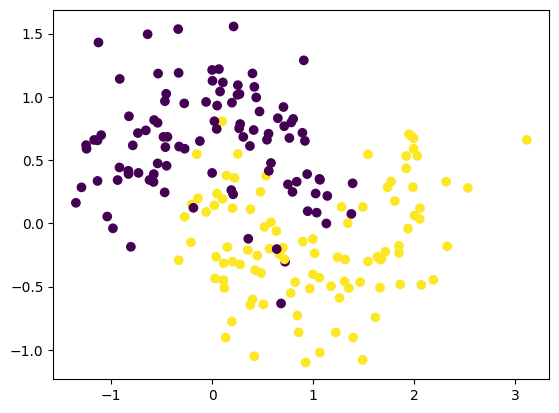

In [5]:
from sklearn.datasets import make_moons

# Geneare the datset
X_moons, y_moons = make_moons(n_samples=200, noise=0.3, random_state=33)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons)
plt.show()

We are going to train trees with a minimum leaf size of 10 and 1 was going to represent the decision boundaries for each tree. It is not too relevant to go into detail about the code that represents the decision boundaries; it is done only for illustrative purposes.

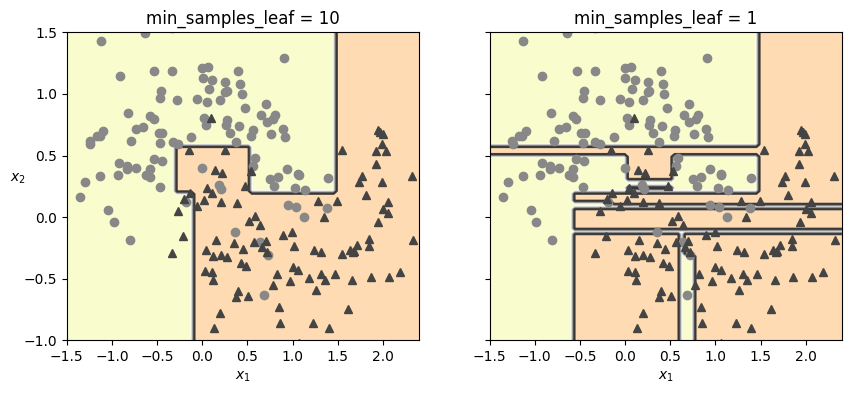

In [6]:
# We train trees with a minimum leaf size of 10 and 1
tree_clf1 = DecisionTreeClassifier(min_samples_leaf=10, random_state=33)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=1,random_state=33)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

# Plot the decision boundaries
def plot_decision_boundaries(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#888888", "#444444"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundaries(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf1.min_samples_leaf}")
plt.sca(axes[1])
plot_decision_boundaries(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

The tree that is at a minimum leaf size of 1 is clearly overfitting the data set.

### Testing the model's performance

To properly measure the performance of the tree we should train on one data set and measure the performance on another. The function **train_test_split** can be used for this:





In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the dataset into 60% training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.4, random_state=42)

# Training the decision tree on the training data
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# Predicting classes for the test set
y_pred = tree_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(cm)

Accuracy: 0.9833333333333333

Confusion matrix:
[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


Cross-validation is a more suitable way to predict performance. We can do this with **cross_val_score** and **cross_val_predict**:

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Training the decision tree using 10-fold cross-validation
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
scores = cross_val_score(tree_clf, X_iris, y_iris, cv=10)

# Show the accuracy obtained in each fold
print("Precisión en cada pliegue:", scores)

# Calculate and display the average accuracy value and standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

# Predict the labels
y_pred = cross_val_predict(tree_clf, X_iris, y_iris, cv=10)

# Calculate and display the confusion matrix
cm = confusion_matrix(y_iris, y_pred)
print("\nMatriz de confusión:")
print(cm)


Precisión en cada pliegue: [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
Mean accuracy: 0.96
Standard deviation: 0.03265986323710903

Matriz de confusión:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


Using **ConfusionMatrixDisplay** we can graphically represent the confusion matrix. This is especially useful when we have a large number of classes.

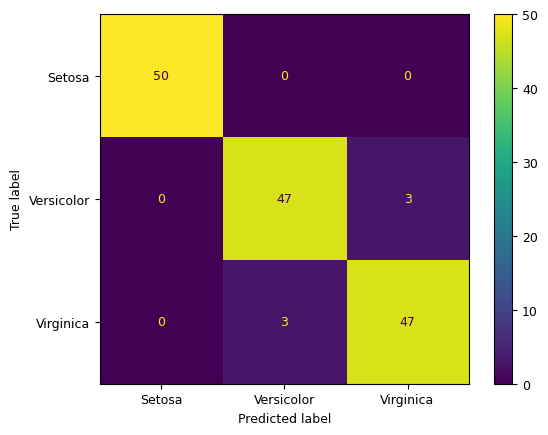

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

# We must pass to from_predictions the real labels and the predicted labels to the method
ConfusionMatrixDisplay.from_predictions(y_iris, y_pred)
plt.show()

Sometimes it is easier to interpret the matrix if we represent it as a percentage.

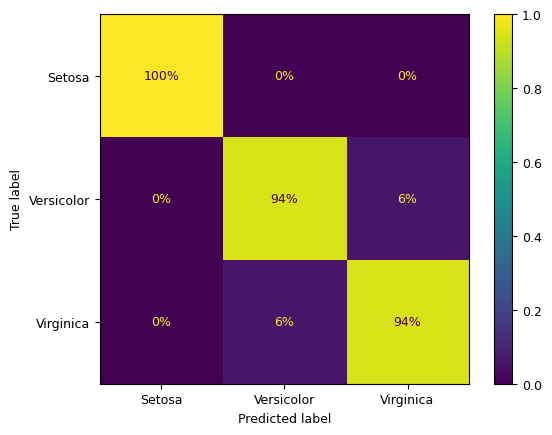

In [33]:
ConfusionMatrixDisplay.from_predictions(y_iris, y_pred,
                                        normalize="true", values_format=".0%")
plt.show()

##SVM

Next, we will train a support vector machine with a linear kernel using **LinearSVC**. We will train it on the diabetes dataset, which is a dataset that has a binary class.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/diabetes.csv'

diabetes = pd.read_csv(url)

# The featrures
X = diabetes.iloc[:, :-1]
# The class
y = diabetes.iloc[:,-1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

# dual='auto' avoids the generation of warnings.
# It chooses the algorithm to use for training depending on the size of the data set and the number of features.
svm_clf = LinearSVC(  dual='auto',  random_state=42)

cross_val_score(svm_clf, X, y, cv=10, scoring="accuracy")

array([0.72727273, 0.76623377, 0.80519481, 0.71428571, 0.75324675,
       0.76623377, 0.80519481, 0.80519481, 0.76315789, 0.82894737])

To use non-linear kernels we must use **SVC**. Through the **kernel** parameter we will indicate which one we want to use; the available options are **‘linear’**, **‘poly’**, **‘rbf’**, and **‘sigmoid’**.,

In [29]:
from sklearn.svm import SVC

# C is a egularization parameter. The strength of the regularization is inversely proportional to C.
#Must be strictly positive. The penalty is a squared l2 penalty
svm_clf = SVC(kernel="rbf", C=1, random_state=42)
cross_val_score(svm_clf, X, y, cv=10, scoring="accuracy")

array([0.75324675, 0.75324675, 0.77922078, 0.67532468, 0.74025974,
       0.76623377, 0.74025974, 0.76623377, 0.71052632, 0.78947368])

##Naive Bayes

Sklearn does not support Bayesian algorithms that allow processing nominal and metric data together. If we have data sets with both types of attributes, we will have to make the appropriate transformations so that they are all of the same type and we will have to choose the appropriate Predictor for the data set:

*   **BernoulliNB** is designed for binary/boolean features.
*   **CategoricalNB** is designed for features that are categorically distributed (ordinal features). These features must be represented as integers. You may use **OrdinalEncoder** to transform nominal to this end.
*   **GaussianNB** is designed for metric features.

We will apply Naive Bayes on the iris dataset using **GaussianNB**:

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Perform 10-fold cross-validation and get accuracy scores
scores = cross_val_score(gnb, X_iris, y_iris, cv=10, scoring='accuracy')

# Print the mean accuracy and standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Mean accuracy: 0.9533333333333334
Standard deviation: 0.04268749491621898


Let us apply **CategoricalNB** over the golf dataset.

In [28]:

from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder

url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/golf.csv'

golf = pd.read_csv(url)

# Create a Gaussian Naive Bayes classifier
gnb = CategoricalNB()

# Prepare the data
X_golf = golf.drop('Play', axis=1)
y_golf = golf['Play']

# Encode the attributes with OrdinalEncoder
X_golf = OrdinalEncoder().fit_transform(X_golf)

gnb.fit(X_golf, y_golf)

# Perform 3-fold cross-validation and get accuracy score
# (we do not have enough data for a 10-fold validation)
scores = cross_val_score(gnb, X_golf, y_golf, cv=3, scoring='accuracy')

# Print the mean accuracy and standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())


Mean accuracy: 0.65
Standard deviation: 0.07071067811865477


## K Nearest Neighbors

We can apply the K Nearest Neighbors algorithm using the Predictor **NearestNeighbors**

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Perform 10-fold cross-validation
scores = cross_val_score(knn, X_iris, y_iris, cv=10)

# Print mean and standard deviation of scores
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())


Mean accuracy: 0.9666666666666668
Standard deviation: 0.04472135954999579


## Regression



### Linear regression

We will apply linear regression on the Boston house price data set

In [12]:
url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/housing.csv'

housing = pd.read_csv(url)

The average income of the house's inhabitants is truncated at $50,000:

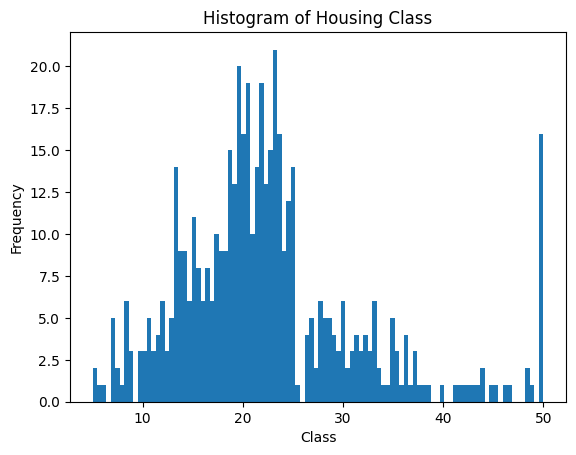

In [62]:
plt.hist(housing['class'], bins=100)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Class')
plt.show()

We will delete this data:

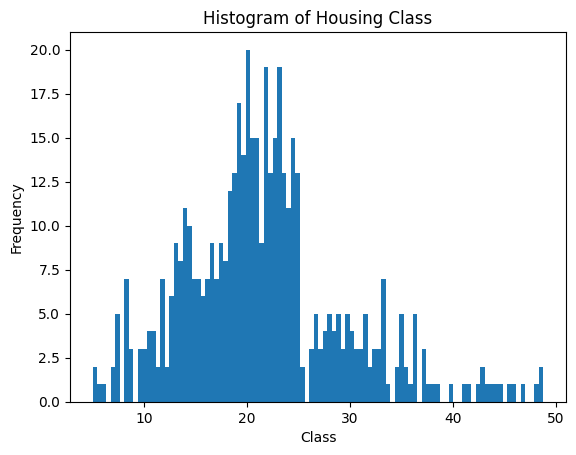

In [63]:
# Remove data from the housing dataset that has a class value greater than 49,999
housing = housing[housing['class'] <= 49.999]

plt.hist(housing['class'], bins=100)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Class')
plt.show()


The predictor **LinearRegression** can be used for linear regression:

RMSE in each fold: [2.7784322  3.25385714 2.83396506 3.79779567 4.54517387 4.83102497
 2.87083758 8.92419449 5.38900915 3.43950624]

Mean RMSE: 4.266379636447395

Standard deviation of the RMSE: 1.7746525272224731


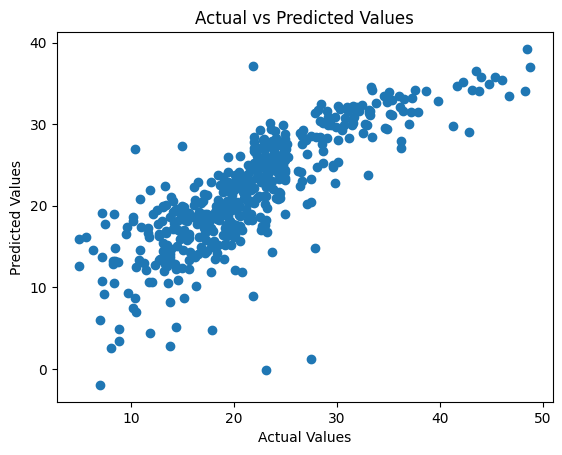

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = housing.drop('class', axis=1)
y = housing['class']

# Create the linear regression model
model = LinearRegression()

# Perform 10-fold cross-validation
# cross_val_score tries to maximize the scorng function; hence the use of the negatime MSE
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

# The scores obtained are negative errors, so we convert them to positive
rmse_scores = np.sqrt(-scores)

# Print the results
print("RMSE in each fold:", rmse_scores)
print("\nMean RMSE:", rmse_scores.mean())
print("\nStandard deviation of the RMSE:", rmse_scores.std())

# Make predictions
y_pred = cross_val_predict(model, X, y, cv=10)

# Plot the actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

### Nonlinear regression

Using **PolynomialFeatures** we can create non-linear features from the original ones and perform linear regression using **LinearRegression**:

RMSE in each fold: [ 3.84584975  2.57137487  7.57582948  5.60247128  6.12073739  4.224376
  4.47002106 18.74033621  6.70868231  7.58613757]

Mean RMSE: 6.7445815925386885

Standard deviation of the RMSE: 4.293431812715369


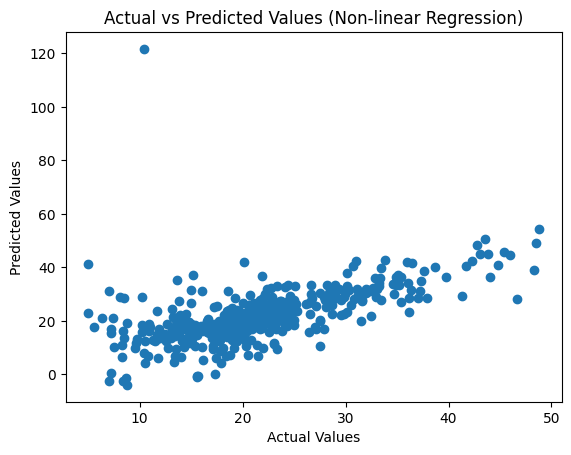

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


X = housing.drop('class', axis=1)
y = housing['class']

# Create polynomial features
degree = 2  # Polynomial degree
poly_features = PolynomialFeatures(degree=degree)

x_nonlinear = poly_features.fit_transform(X)

# Create the non-linear regression model
model = LinearRegression()

# Perform 10-fold cross-validation
scores = cross_val_score(model, x_nonlinear, y, cv=10, scoring='neg_mean_squared_error')

# The scores obtained are negative errors, so we convert them to positive
rmse_scores = np.sqrt(-scores)

# Print the results
print("RMSE in each fold:", rmse_scores)
print("\nMean RMSE:", rmse_scores.mean())
print("\nStandard deviation of the RMSE:", rmse_scores.std())

# Make predictions
y_pred = cross_val_predict(model, x_nonlinear, y, cv=10)

# Plot the actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Non-linear Regression)")
plt.show()

If you are interested in regularized regression models see the documentation for the **Ridge** (L2 regularization), **Lasso** (L1 regularization) and **ElasticNet** (weighted average of L1 and L2) classes.

### Perceptron for regression

It is also possible to use neural networks (perceptron) for regression

RMSE in each fold: [2.93586664 3.13942481 2.46987761 3.2679283  3.17049357 3.82427883
 2.53432174 5.79283641 3.93530847 4.57301458]

Mean RMSE: 3.5643350950042327

Standard deviation of the RMSE: 0.9626057644483094


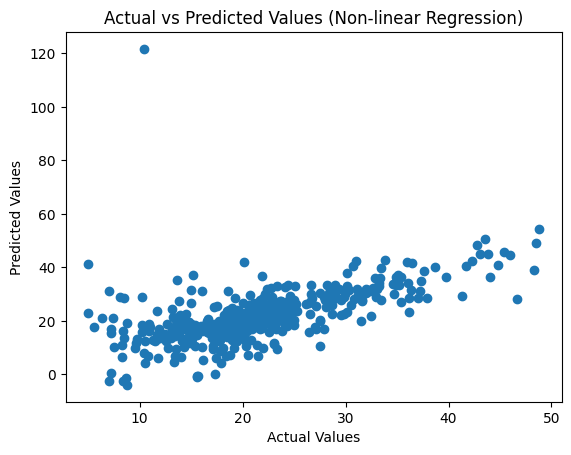

In [102]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler

# Create a Perceptron model with 3 layers each with 30 neurons
perceptron = MLPRegressor(hidden_layer_sizes=[30, 30, 30])

# Before applying the perceptron it is a good idea to normalize the features;
# (with linear models this is not relevant (we will get the same result in both cases)
scaler = StandardScaler()
scaler.set_output(transform='pandas')
X = scaler.fit_transform(X)

# Perform 10-fold cross-validation
scores = cross_val_score(perceptron, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)


# Print the results
print("RMSE in each fold:", rmse_scores)
print("\nMean RMSE:", rmse_scores.mean())
print("\nStandard deviation of the RMSE:", rmse_scores.std())

# Make predictions
y_pred = cross_val_predict(model, x_nonlinear, y, cv=10)

# Plot the actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Non-linear Regression)")
plt.show()